In [5]:
import pandas as pd              #importing necessary packages
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv(r"/content/drive/MyDrive/landslide_data3_miss.csv") #missing file
df_w=df.copy() #creating copy of dataframe


number of missing values in each column dates            0
stationid       19
temperature     66
humidity        45
pressure        77
rain            38
lightavgw/o0    47
lightmax        31
moisture        31
dtype: int64


Text(0.5, 1.0, 'number of missing values in each column')

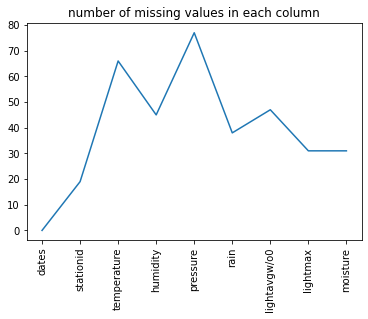

In [6]:
# count of missing values in each column
print("number of missing values in each column",df.isnull().sum())
y_points=np.array(df.isnull().sum())
x_points=list(df.columns)

plt.plot(x_points,y_points,)
plt.xticks(rotation='vertical')

plt.title("number of missing values in each column")


In [7]:
modified_df = df_w.dropna( how='any',subset=['stationid'])    #dropping missing values in station id
originaldf_rows=df.shape[0]           
modifieddf_rows=modified_df.shape[0]
deleted_row=originaldf_rows-modifieddf_rows
print("Number of deleted rows:",deleted_row)



Number of deleted rows: 19


In [26]:

df_new=df_w[df_w.isnull().sum(axis=1)<(1/3)*(len(df.columns))]       
df_new_c=modified_df[modified_df.isnull().sum(axis=1)<(1/3)*(len(df.columns))]

deleted_row1=df_w.shape[0]-df_new.shape[0]
print("Number of deleted rows:",deleted_row1)

print("number of missing values in each column",df_new.isnull().sum())
print("number of total missing values",df_new.isnull().sum().sum())
print("number of missing values in each column",df_new_c.isnull().sum())
print("number of total missing values",df_new_c.isnull().sum().sum())




Number of deleted rows: 39
number of missing values in each column dates            0
stationid       15
temperature     34
humidity        13
pressure        41
rain             7
lightavgw/o0    15
lightmax         1
moisture         6
dtype: int64
number of total missing values 132
number of missing values in each column dates            0
stationid        0
temperature     34
humidity        13
pressure        41
rain             6
lightavgw/o0    15
lightmax         1
moisture         6
dtype: int64
number of total missing values 116


In [25]:
df_2=df.copy()
list_of_attributes=list(df_w.columns)
list_of_attributes.remove('stationid')
list_of_attributes.remove('dates')
for attribute in list_of_attributes:
  calculated_mean=df_w[attribute].mean()
  df_2.fillna(value=calculated_mean,inplace=True)


In [10]:
df_orig=pd.read_csv(r'/content/drive/MyDrive/landslide_data3_original.csv') #df without normal values


for attribute in list_of_attributes:
  calculated_mean=df_orig[attribute].mean()
  new_mean=df_2[attribute].mean()
  print("mean of original file ",attribute,"is",calculated_mean)
  print("mean of new file ",attribute,"is",new_mean)

  calculated_median=df_orig[attribute].median()
  new_median=df_2[attribute].median()
  print("median of original file ",attribute,"is",calculated_median)
  print("median of new file ",attribute,"is",new_median)

  calculated_mode=df_orig[attribute].mode()
  new_mode=df_2[attribute].mode()
  print("mode of original file ",attribute,"is",calculated_mode)
  print("mode of new file ",attribute,"is",new_mode)

  calculated_standard_deviation=df_orig[attribute].std()
  new_std=df_2[attribute].std()
  print("standard deviation of original file",attribute,"is",calculated_standard_deviation)
  print("standard deviation of new file ",attribute,"is",new_std)
  print("-------------------")




mean of original file  temperature is 21.2148881058201
mean of new file  temperature is 21.07854536973834
median of original file  temperature is 22.27273
median of new file  temperature is 21.8
mode of original file  temperature is 0    12.72727
dtype: float64
mode of new file  temperature is 0    21.078545
dtype: float64
standard deviation of original file temperature is 4.355817940432199
standard deviation of new file  temperature is 4.243347000299791
-------------------
mean of original file  humidity is 83.47993155555555
mean of new file  humidity is 80.30056385358543
median of original file  humidity is 91.38095
median of new file  humidity is 90.11905
mode of original file  humidity is 0    99.0
dtype: float64
mode of new file  humidity is 0    99.0
dtype: float64
standard deviation of original file humidity is 18.210064667980546
standard deviation of new file  humidity is 22.324738144323277
-------------------
mean of original file  pressure is 1009.0087738022222
mean of new fi

[0.9923316286617758, 14.834909547938599, 281.59570010572526, 3648.6346861134034, 1901.259771326379, 6185.218148594085, 3.7107025056457363]


([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text major ticklabel objects>)

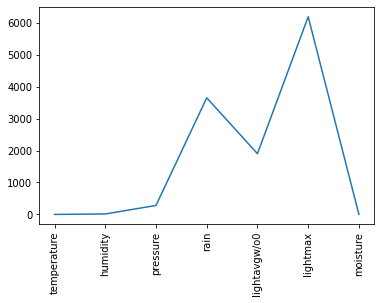

In [17]:
y_pts=[]
for attribute in list_of_attributes:
    diff=(df_orig[attribute]-df_2[attribute])**2
    rmse=((diff).mean())**0.5
    
    y_pts.append(rmse)
print(y_pts)

plt.plot(list_of_attributes,y_pts)
plt.xticks(rotation='vertical')

    

    
  


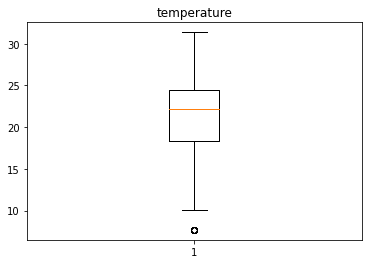

temperature       18.314690
humidity          73.136805
pressure        1009.620000
rain               0.000000
lightavgw/o0     417.039200
lightmax        4000.000000
moisture           2.993000
Name: 0.25, dtype: float64
[18.31469, 73.13680500000001, 1009.62, 0.0, 417.0392, 4000.0, 2.993]
[24.41667, 98.605635, 1020.820611, 987.75, 4488.9103, 54612.0, 64.5357]
outliers in temperature: [7.6729, 7.6729, 7.6729, 7.6729, 7.6729, 7.6729, 7.6729, 7.6729, 7.6729, 7.6729]


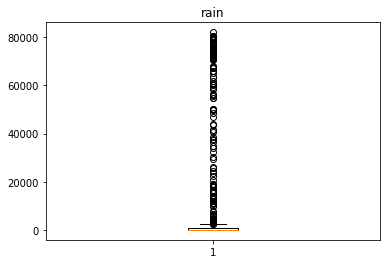

In [28]:
import matplotlib.pyplot as plt 
df_new1=df_w.interpolate()

     
  




In [29]:
for attribute in list_of_attributes:
  calculated_mean1=df_orig[attribute].mean()
  new_mean1=df_new1[attribute].mean()
  print("mean of original file ",attribute,"is",calculated_mean1)
  print("mean of new file ",attribute,"is",new_mean1)

  calculated_median1=df_orig[attribute].median()
  new_median1=df_new1[attribute].median()
  print("median of original file ",attribute,"is",calculated_median1)
  print("median of new file ",attribute,"is",new_median1)

  calculated_mode1=df_orig[attribute].mode()
  new_mode1=df_new1[attribute].mode()
  print("mode of original file ",attribute,"is",calculated_mode1)
  print("mode of new file ",attribute,"is",new_mode1)

  calculated_standard_deviation1=df_orig[attribute].std()
  new_std1=df_new1[attribute].std()
  print("standard deviation of original file",attribute,"is",calculated_standard_deviation1)
  print("standard deviation of new file ",attribute,"is",new_std1)
  print("-------------------")



mean of original file  temperature is 21.2148881058201
mean of new file  temperature is 21.196222460317465
median of original file  temperature is 22.27273
median of new file  temperature is 22.16921
mode of original file  temperature is 0    12.72727
dtype: float64
mode of new file  temperature is 0    12.72727
dtype: float64
standard deviation of original file temperature is 4.355817940432199
standard deviation of new file  temperature is 4.3295041165853245
-------------------
mean of original file  humidity is 83.47993155555555
mean of new file  humidity is 83.5382453121693
median of original file  humidity is 91.38095
median of new file  humidity is 91.38095
mode of original file  humidity is 0    99.0
dtype: float64
mode of new file  humidity is 0    99.0
dtype: float64
standard deviation of original file humidity is 18.210064667980546
standard deviation of new file  humidity is 18.206726644570708
-------------------
mean of original file  pressure is 1009.0087738022222
mean of ne

[0.49039317926772374, 0.8393130045849451, 7.03347175329215, 1206.1476861370707, 1241.5914494441092, 3830.8293360939574, 1.27346446390451]


([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text major ticklabel objects>)

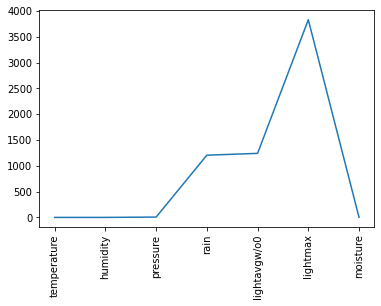

In [30]:
y_pts1=[]
for attribute in list_of_attributes:
    diff=(df_orig[attribute]-df_new1[attribute])**2
    rmse1=((diff).mean())**0.5
    
    y_pts1.append(rmse1)
print(y_pts1)

plt.plot(list_of_attributes,y_pts1)
plt.xticks(rotation='vertical')

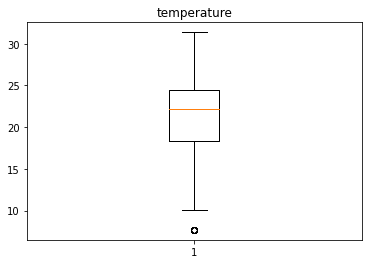

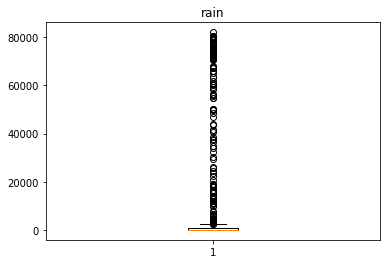

outliers in temperature: [7.6729, 7.6729, 7.6729, 7.6729, 7.6729, 7.6729, 7.6729, 7.6729, 7.6729, 7.6729]


In [33]:
median_t=df_new1['temperature'].median()
median_r=df_new1['rain'].median()
lower_bound=[]
upper_bound=[]

plt.boxplot(df_new1['temperature'])
plt.title('temperature')
plt.show()
plt.boxplot(df_new1['rain'])
plt.title('rain')
plt.show()

q1 = df_new1.quantile(0.25)

q1=list(q1)

q3 = df_new1.quantile(0.75)
q3=list(q3)


list_outlier_t=[]
iqr_t = q3[0]-q1[0]


lower_bound.append(q1[0]-(1.5*iqr_t))
upper_bound.append(q3[0]+(1.5*iqr_t))
temperature=list(df_new1['temperature'])

for i in temperature:
  if i>=upper_bound[0] or i<=lower_bound[0]:
    list_outlier_t.append(i)
print("outliers in temperature:",list_outlier_t)





In [21]:




list_outlier_r=[]
iqr_r = q3[3]-q1[3]


lower_bound.append(q1[3]-(1.5*iqr_r))
upper_bound.append(q3[3]+(1.5*iqr_r))
rain=list(df_new['rain'])

for i in rain:
     
  if i>=upper_bound[1] or i<=lower_bound[1]:
    list_outlier_r.append(i)
print("outliers in rain:",list_outlier_r)



outliers in rain: [13583.25, 6791.625, 15459.75, 14001.75, 16571.25, 13666.5, 59982.75, 80000.0, 75048.75, 80000.0, 80000.0, 80000.0, 80000.0, 3930.5, 36636.75, 40789.0, 2470.5, 63256.5, 54616.5, 50172.75, 37928.25, 26178.75, 3138.75, 3449.25, 18884.25, 9765.0, 18976.5, 30393.0, 2814.75, 25697.25, 80000.0, 82037.25, 56319.75, 71968.5, 80000.0, 80000.0, 50242.5, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 60675.75, 41463.0, 22250.25, 2637.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 80000.0, 37392.75, 49725.0, 80000.0, 80000.0, 71154.0, 80000.0, 80000.0, 12854.25, 34879.5, 4610.25, 6210.0, 10557.0, 3451.5, 3312.0, 18285.75, 3613.5, 2893.5, 23474.25, 14042.25, 3647.25, 5877.0, 10062.0, 17997.75, 29517.75, 32514.75, 13943.25, 4212.0, 4691.25, 751

22.16921


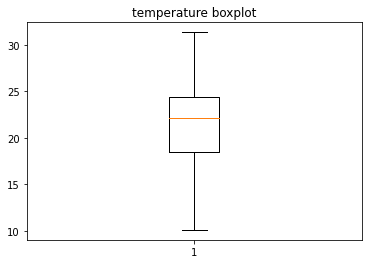

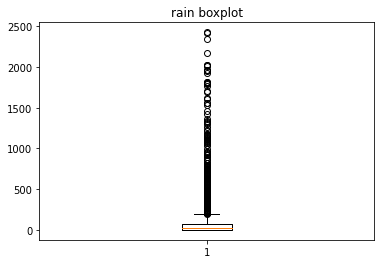

In [22]:
import matplotlib.pyplot as plt

   


df_new['temperature']=df_new['temperature'].replace(list_outlier_t,median_t)
plt.boxplot(df_new['temperature'])

plt.title("temperature boxplot")
plt.show()


df_new['rain']=df_new['rain'].replace(list_outlier_r,median_r)
plt.boxplot(df_new['rain'])


plt.title("rain boxplot")
plt.show()
